In [178]:
import json
import pandas as pd
from math import sqrt
import matplotlib.pyplot as plt
import seaborn as sns

def load_file(filename):
    data = []
    with open(filename) as f:
        for line in f.readlines():
            d = json.loads(line)

            # drop all the metadata and the raw sample values
            record = {
                **d['relays'],
                **d['data'],
            }

            # flip the sign of the caps value if the z value is 1
            if record['z'] == 1:
                record['caps'] *= -1

            record.pop('z')

            record['sum'] = record['t_v_mag'] + record['t_c_mag']
            record['rms'] = ((sqrt(record['t_v_mag']) + sqrt(record['t_c_mag'])) / 2) ** 2
            record['diff'] = abs(record['t_v_mag'] - record['t_c_mag'])

            record['t_signed_phase'] = record['t_phase']
            if record['t_sign'] == 1:
                record['t_signed_phase'] *= -1

            # record.pop('t_sign')

            data.append(record)

    df = pd.DataFrame.from_records(data)

    return df

In [179]:
df = load_file('ant3_14mhz.jsonl')

df.sort_values(by='m_swr')


caps  inds      m_fwd     m_rev      m_swr     m_freq  m_temp  \
395     12    11  98.000000  0.073735   1.047690  80.037497    13.0   
394     12    10  96.666667  0.335627   1.079926  80.037497    13.0   
364     11    12  97.333333  0.409572   1.137044  79.812499    13.0   
363     11    11  96.000000  0.578882   1.155998  79.812499    13.0   
426     13    10  97.333333  0.550334   1.161853  80.262495    13.0   
...    ...   ...        ...       ...        ...        ...     ...   
954     29    26   4.000000  4.461461  83.753910  83.525000    13.0   
956     29    28   4.000000  4.378058  86.286569  83.525000    13.0   
955     29    27   4.000000  4.424135  87.084217  83.562499    13.0   
1018    31    26   4.000000  4.433910  90.190039  83.637496    13.0   
1019    31    27   4.000000  4.415102  90.670373  83.674997    13.0   

          t_v_mag      t_c_mag      t_phase  t_sign        t_freq  \
395   2134.333333  2266.333333    25.333333     0.0  14008.000000   
394   2137.333333  2266.666667   492.000000     0.0  14008.000000   
364   2155.666667  2240.666667   134.000000     0.0  14007.333333   
363   2158.000000  2247.333333   441.333333     0.0  14007.333333   
426   2119.333333  2277.000000   285.666667     0.0  14005.333333   
...           ...          ...          ...     ...           ...   
954   2051.333333  1809.333333  2375.333333     1.0  14011.333333   
956   2053.333333  1791.666667  2377.666667     1.0  14009.333333   
955   2051.333333  1800.000000  2376.000000     1.0  14008.000000   
1018  2052.000000  1806.666667  2385.666667     1.0  14006.666667   
1019  2098.666667  1839.333333  2371.666667     1.0  14007.333333   

              sum          rms        diff  t_signed_phase  
395   4400.666667  2199.838297  132.000000       25.333333  
394   4404.000000  2201.525127  129.333333      492.000000  
364   4396.333333  2197.961221   85.000000      134.000000  
363   4405.333333  2202.440201   89.333333      441.333333  
426   4396.333333  2197.459635  157.666667      285.666667  
...           ...          ...         ...             ...  
954   3860.666667  1928.435292  242.000000    -2375.333333  
956   3845.000000  1920.271492  261.666667    -2377.666667  
955   3851.333333  1923.614266  251.333333    -2376.000000  
1018  3858.666667  1927.381578  245.333333    -2385.666667  
1019  3938.000000  1966.862911  259.333333    -2371.666667  

[2048 rows x 16 columns]

<Axes: xlabel='caps', ylabel='inds'>

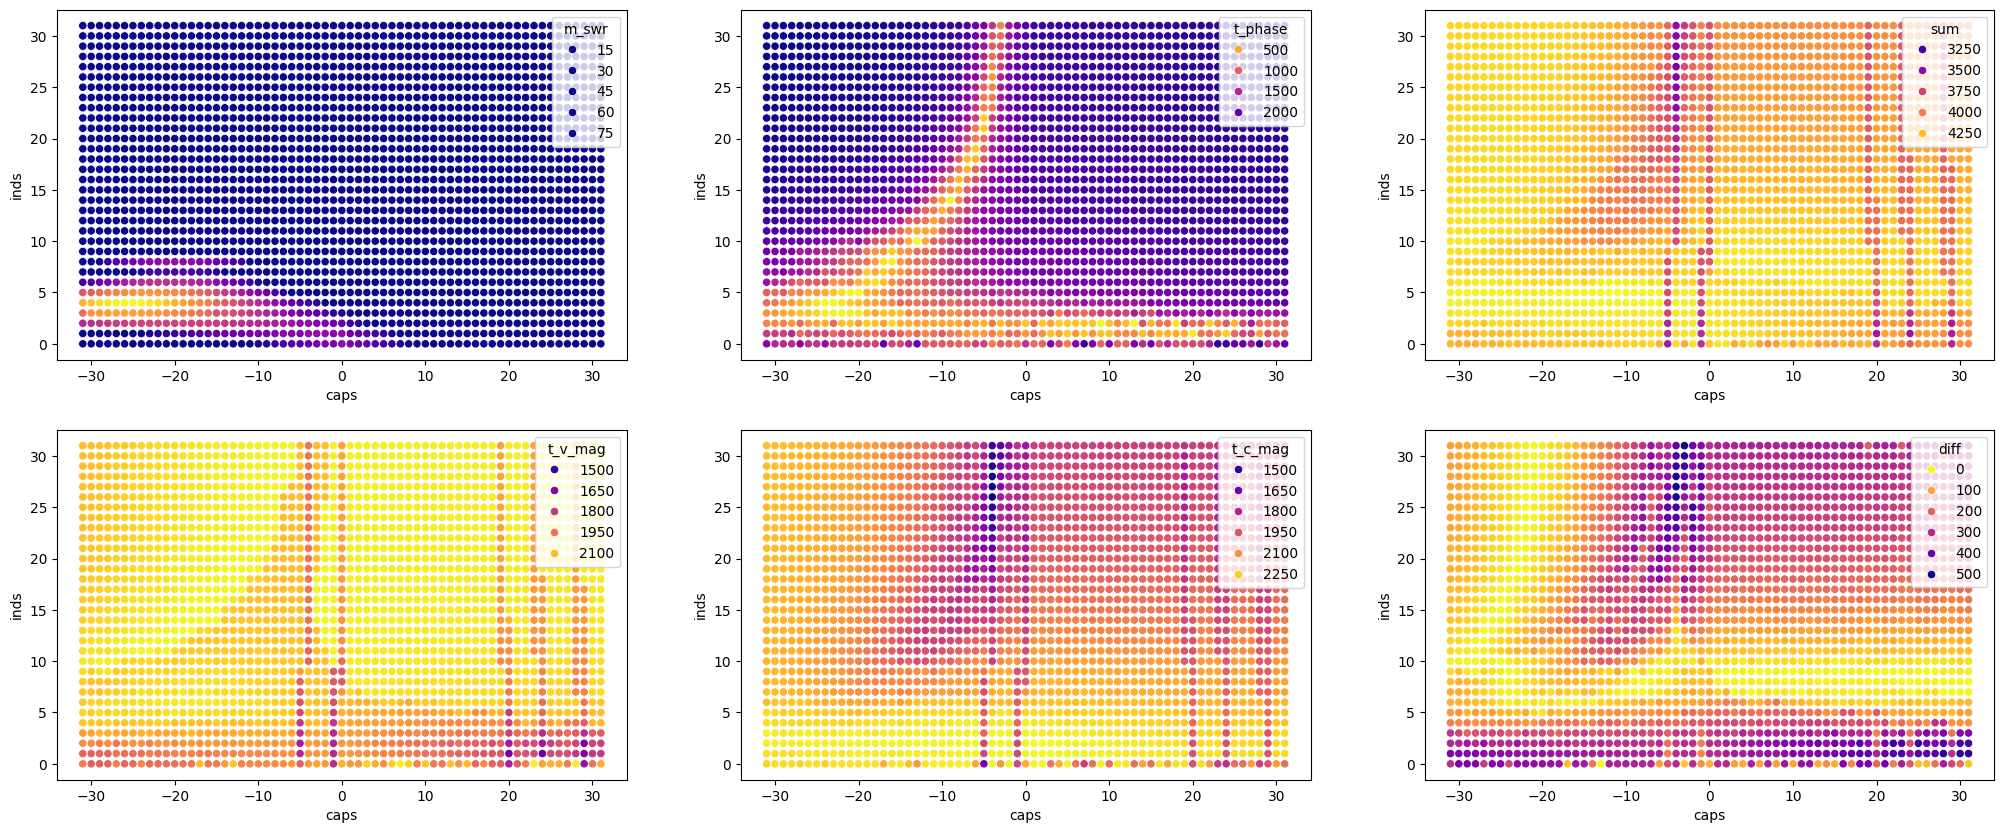

In [180]:
df = load_file('ant2_14mhz.jsonl')

fig, ax = plt.subplots(2, 3, figsize=(25, 10))

sns.scatterplot(df, x='caps', y='inds', hue='m_swr', hue_norm=(1.0, 3.0), palette='plasma_r', ax=ax[0, 0])
sns.scatterplot(df, x='caps', y='inds', hue='t_phase', palette='plasma_r', ax=ax[0, 1])
sns.scatterplot(df, x='caps', y='inds', hue='sum', palette='plasma', ax=ax[0, 2])
sns.scatterplot(df, x='caps', y='inds', hue='t_v_mag', palette='plasma', ax=ax[1, 0])
sns.scatterplot(df, x='caps', y='inds', hue='t_c_mag', palette='plasma', ax=ax[1, 1])
sns.scatterplot(df, x='caps', y='inds', hue='diff', palette='plasma_r', ax=ax[1, 2])


<Axes: xlabel='caps', ylabel='inds'>

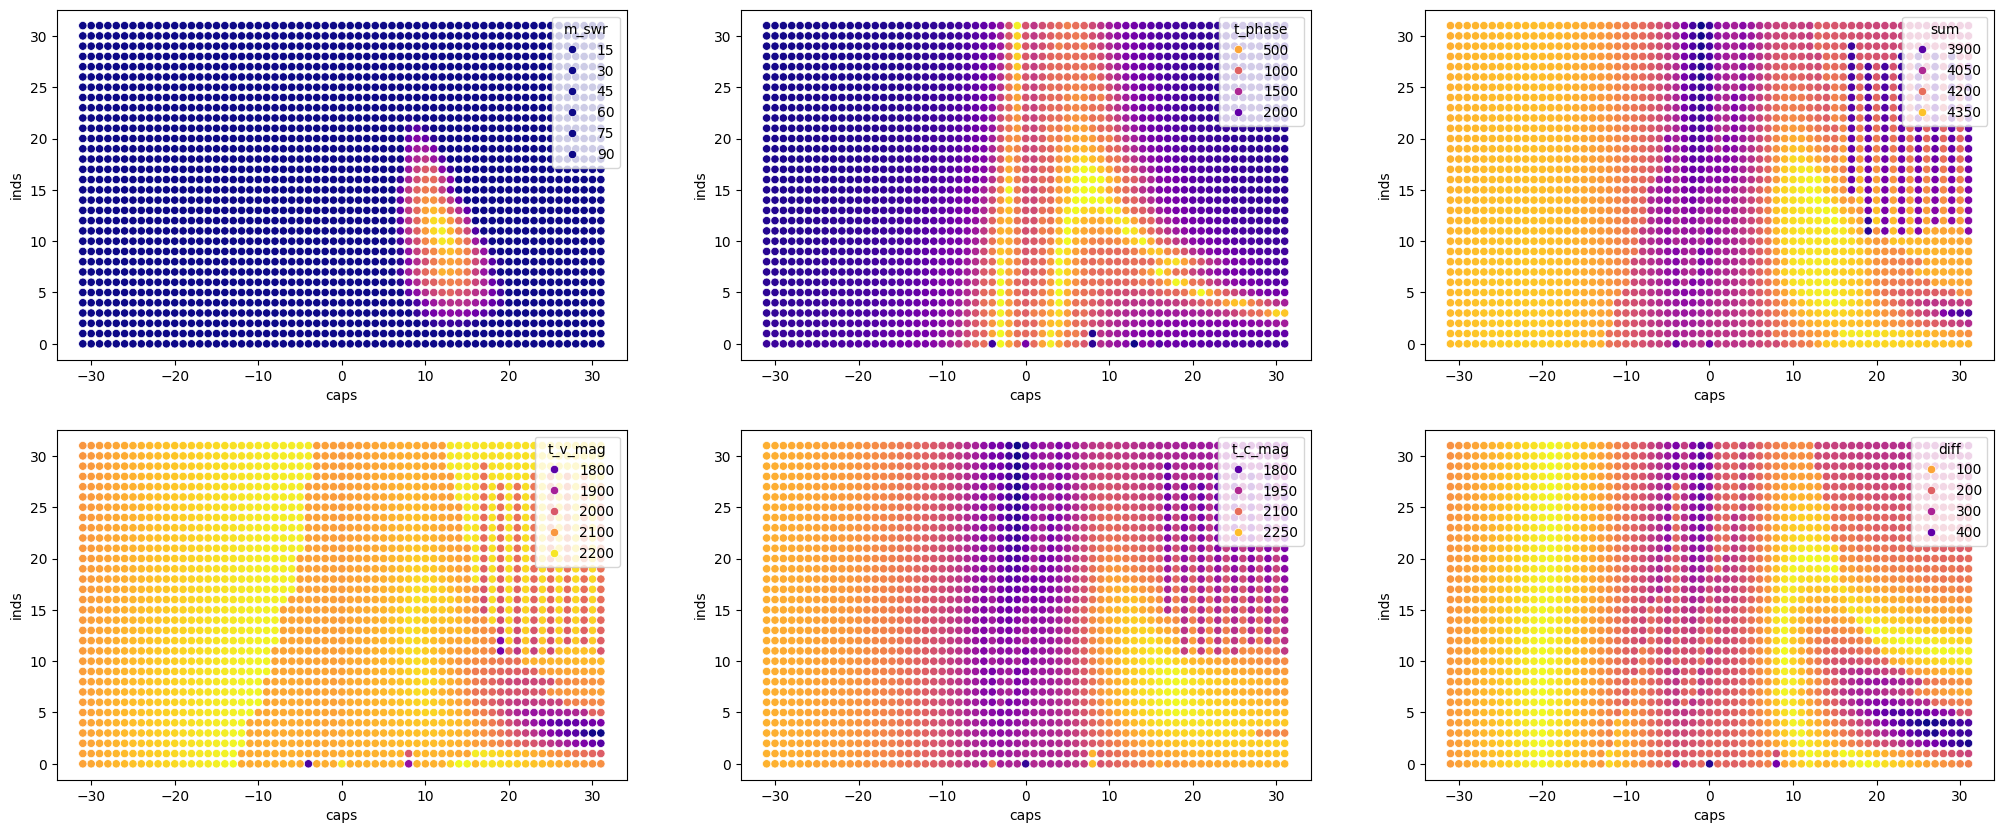

In [181]:
df = load_file('ant3_14mhz.jsonl')

fig, ax = plt.subplots(2, 3, figsize=(25, 10))

sns.scatterplot(df, x='caps', y='inds', hue='m_swr', hue_norm=(1.0, 3.0), palette='plasma_r', ax=ax[0, 0])
sns.scatterplot(df, x='caps', y='inds', hue='t_phase', palette='plasma_r', ax=ax[0, 1])
sns.scatterplot(df, x='caps', y='inds', hue='sum', palette='plasma', ax=ax[0, 2])
sns.scatterplot(df, x='caps', y='inds', hue='t_v_mag', palette='plasma', ax=ax[1, 0])
sns.scatterplot(df, x='caps', y='inds', hue='t_c_mag', palette='plasma', ax=ax[1, 1])
sns.scatterplot(df, x='caps', y='inds', hue='diff', palette='plasma_r', ax=ax[1, 2])


<Axes: xlabel='caps', ylabel='inds'>

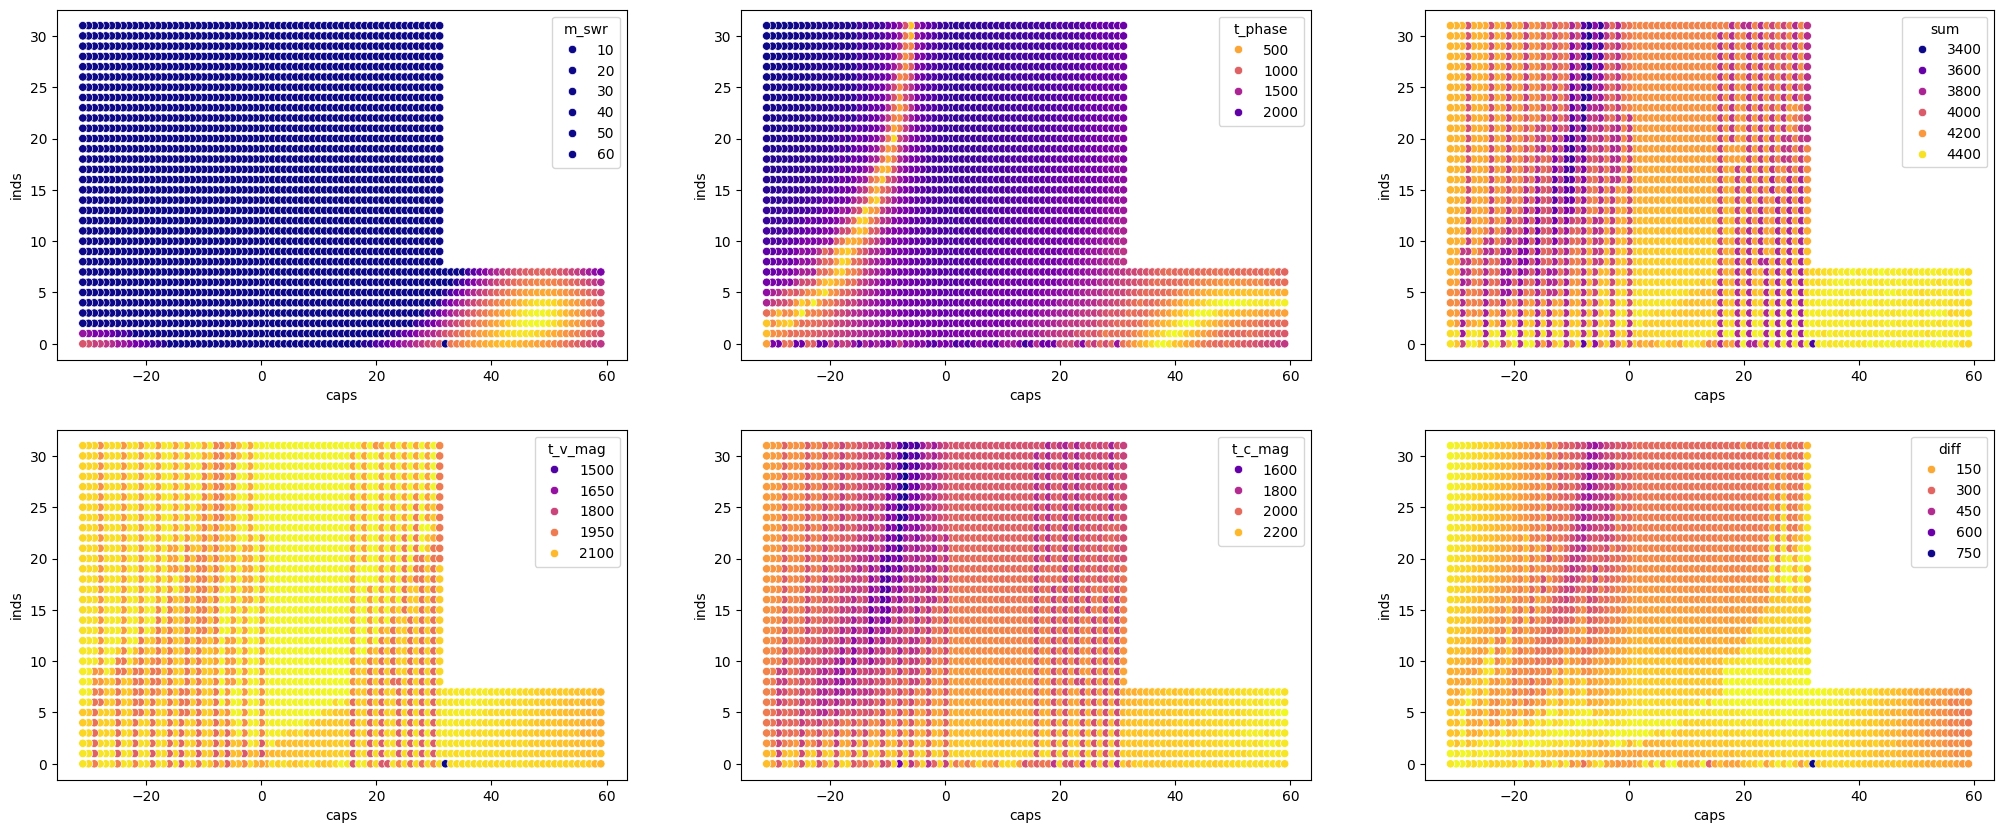

In [182]:
df = load_file('ant3_10mhz.jsonl')

fig, ax = plt.subplots(2, 3, figsize=(25, 10))

sns.scatterplot(df, x='caps', y='inds', hue='m_swr', hue_norm=(1.0, 3.0), palette='plasma_r', ax=ax[0, 0])
sns.scatterplot(df, x='caps', y='inds', hue='t_phase', palette='plasma_r', ax=ax[0, 1])
sns.scatterplot(df, x='caps', y='inds', hue='sum', palette='plasma', ax=ax[0, 2])
sns.scatterplot(df, x='caps', y='inds', hue='t_v_mag', palette='plasma', ax=ax[1, 0])
sns.scatterplot(df, x='caps', y='inds', hue='t_c_mag', palette='plasma', ax=ax[1, 1])
sns.scatterplot(df, x='caps', y='inds', hue='diff', palette='plasma_r', ax=ax[1, 2])


<Axes: xlabel='caps', ylabel='inds'>

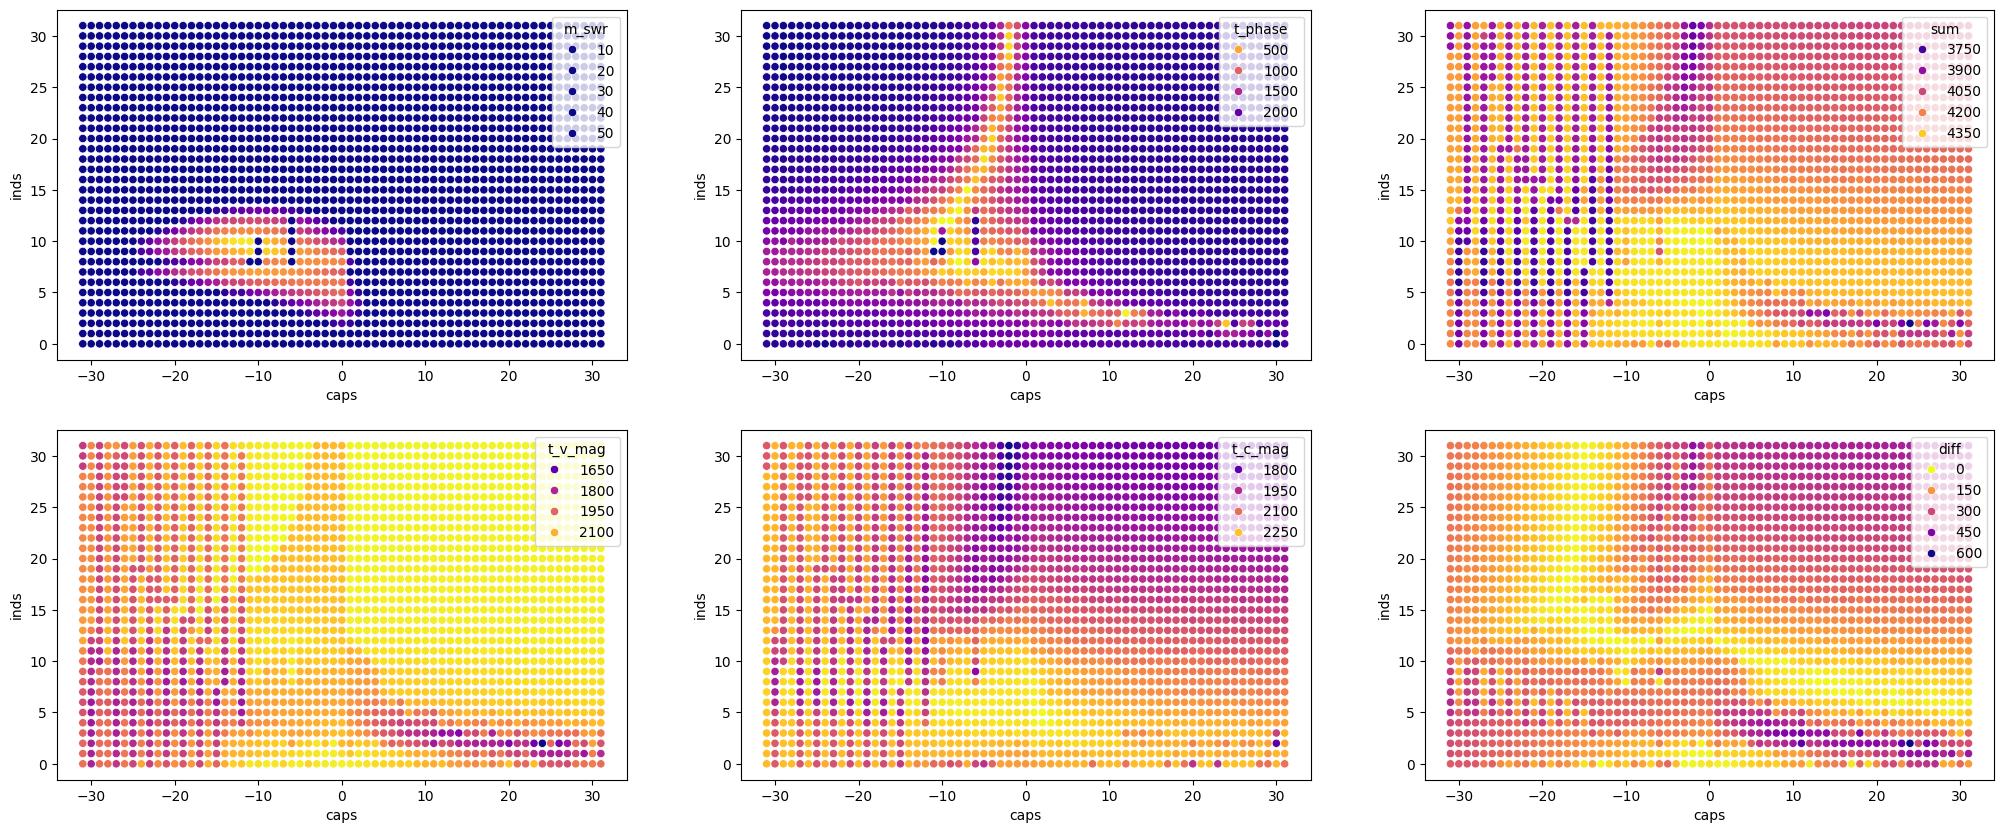

In [183]:
df = load_file('ant3_18mhz.jsonl')

fig, ax = plt.subplots(2, 3, figsize=(25, 10))

sns.scatterplot(df, x='caps', y='inds', hue='m_swr', hue_norm=(1.0, 3.0), palette='plasma_r', ax=ax[0, 0])
sns.scatterplot(df, x='caps', y='inds', hue='t_phase', palette='plasma_r', ax=ax[0, 1])
sns.scatterplot(df, x='caps', y='inds', hue='sum', palette='plasma', ax=ax[0, 2])
sns.scatterplot(df, x='caps', y='inds', hue='t_v_mag', palette='plasma', ax=ax[1, 0])
sns.scatterplot(df, x='caps', y='inds', hue='t_c_mag', palette='plasma', ax=ax[1, 1])
sns.scatterplot(df, x='caps', y='inds', hue='diff', palette='plasma_r', ax=ax[1, 2])
